<a href="https://colab.research.google.com/github/kaatori/IBMx-Python-for-Data-Science/blob/master/Web_Scraping_Final_Assign_(Public).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook illustrates my final assignment of scraping webpages as part of the course titled "Python Basics for Data Science" by IBMx via edX.org. 

In this final assignment, the goals were to:

1. Access website data stored within tables using a web scraper function in Python;
2. Translate the data into a dataframe; 
3. Store the newly-scraped data as `.csv` files;
4. Graph/visualize the data;
5. Analyze the data for trends or connections to create meaning/value for a chosen audience. 

Author: K.C. Sperow 

Course: IBMx "Python Basics for Data Science" via edX.org

Course Completion Date: September 2020

Revised: November 2020

In [ ]:
# Check package requirements in Google Colaboratory:
# These packages are needed: BeautifulSoup4, Requests, Boto3, Pandas, and Numpy.

!pip show bs4

Name: bs4
Version: 0.0.1
Summary: Screen-scraping library
Home-page: https://pypi.python.org/pypi/beautifulsoup4
Author: Leonard Richardson
Author-email: leonardr@segfault.org
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: beautifulsoup4
Required-by: 


In [ ]:
!pip show requests

Name: requests
Version: 2.23.0
Summary: Python HTTP for Humans.
Home-page: https://requests.readthedocs.io
Author: Kenneth Reitz
Author-email: me@kennethreitz.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: idna, certifi, urllib3, chardet
Required-by: tweepy, torchtext, tensorflow-datasets, tensorboard, Sphinx, spacy, smart-open, requests-oauthlib, pymystem3, pandas-datareader, kaggle, gspread, google-colab, google-api-core, gdown, folium, fix-yahoo-finance, fastai, coveralls, community, CacheControl


In [ ]:
# Install library packages:

pip install boto3

In [ ]:
# Install dependency package for boto3:

pip install urllib3

In [ ]:
!pip show pandas

Name: pandas
Version: 1.1.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, pytz, python-dateutil
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc3, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fbprophet, fastai, cufflinks, cmdstanpy, altair


In [ ]:
!pip show numpy

Name: numpy
Version: 1.18.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: 
Required-by: yellowbrick, xgboost, xarray, wordcloud, umap-learn, torchvision, torchtext, torch, tifffile, thinc, Theano, tensorflow, tensorflow-probability, tensorflow-hub, tensorflow-datasets, tensorboard, tables, statsmodels, spacy, sklearn-pandas, seaborn, scs, scipy, scikit-learn, resampy, PyWavelets, python-louvain, pystan, pysndfile, pymc3, pyemd, pyarrow, plotnine, patsy, pandas, osqp, opt-einsum, opencv-python, opencv-contrib-python, numexpr, numba, np-utils, nibabel, moviepy, mlxtend, mizani, missingno, matplotlib, matplotlib-venn, lucid, lightgbm, librosa, knnimpute, Keras, Keras-Preprocessing, kapre, jpeg4py, jaxlib, jax, imgaug, imbalanced-learn, imageio, hyperopt, holoviews, h5py, gym, gensim, folium, fix-yahoo-fin

In [2]:
# Import the necessary libraries:
# Beautiful Soup (bs4) is used to scrape webpages: https://pypi.org/project/beautifulsoup4/
# Requests is used in conjunction with Beautiful Soup to parse HTML code: https://requests.readthedocs.io/en/master/
# Pandas is the dataframe analysis library in Python: https://pandas.pydata.org/docs/
# Numpy is for analyzing the dataframe using vectors and arrays: https://numpy.org/doc/
# Boto3 is the low-level access API for Amazon Web Services servers in order to make requests for data transfers: https://boto3.amazonaws.com/v1/documentation/api/latest/index.html

import bs4
import requests
import pandas as pd
import numpy as np
import boto3

ModuleNotFoundError: ignored

In [3]:
def get_basketball_stats(link='https://en.wikipedia.org/wiki/Michael_Jordan'):
    # This function was the only part given by the course for this project 
    # in order for students to focus on the analysis process. 
    # K.C. Sperow added, edited, and refined a great deal of the comments to explain how
    # this function works step-by-step because very little of the function was explained
    # by the course authors.

    # Create an object to store the response from sending a request 
    # to the webpage to be scraped.
    response = requests.get(link)

    # Create a BeautifulSoup object to parse the HTML from that response.  
    soup = bs4.BeautifulSoup(response.text, 'html.parser')

    # The player stats are defined with the attribute CSS class set to 
    # 'wikitable sortable'; therefore, create a tag object "table"
    # in order to pick out only the info needed found in the tables.
    # Create an object in order to store the table info.
    table=soup.find(class_='wikitable sortable')

    # The headers of the table are the first table row ('tr');
    # and it is necessary to create a tag object that has the first row.  
    headers=table.tr

    # The table column names are displayed as an abbreviation; 
    # therefore, find all the 'abbr' tags and store them in the object 'titles'.
    titles=headers.find_all("abbr")

    # Create a dictionary where the key value pairs will be each 
    # table header (key) and each column as a list (value). 
    data = {title['title']:[] for title in titles}

    # Using a 'for' loop, iterate over each table row by finding each 
    # table tag 'tr' and assigning it to the object 'data'.
    for row in table.find_all('tr')[1:]:
    
        # Iterate over each cell in the row. 
        # As each cell corresponds to a different column, obtain all of the 
        # corresponding keys that go with the columns.
        for key,a in zip(data.keys(),row.find_all("td")[2:]):
            # Append each element and strip any extra HTML content. 
            data[key].append(''.join(c for c in a.text if (c.isdigit() or c == ".")))

    # Remove extra rows by finding the smallest list.     
    Min=min([len(x)  for x in data.values()])

    # Convert the elements in the key to floats. 
    for key in data.keys():
        data[key]=list(map(lambda x: float(x), data[key][:Min]))
    return data

In [4]:
# Create a list object to hold each link to each player's wiki page.
links=['https://en.wikipedia.org/wiki/Michael_Jordan'\
       ,'https://en.wikipedia.org/wiki/Kobe_Bryant'\
      ,'https://en.wikipedia.org/wiki/LeBron_James'\
      ,'https://en.wikipedia.org/wiki/Stephen_Curry']


# Create another list object to hold the player names.      
names=['Michael Jordan','Kobe Bryant','Lebron James','Stephen Curry']

In [5]:
# The course authors had previously taught two ways to get the stats for each of the four (4) players:
# One can either pass the fill link into the function,
# or one can pass the index of each link in the list object 'links' into the function.

# michael_jordan_dict = get_basketball_stats('https://en.wikipedia.org/wiki/Michael_Jordan')
# OR
# michael_jordan_dict = get_basketball_stats(links[0])


In [6]:
# Call the function above and pass in the '0' index from the 'links' object.
michael_jordan_dict=get_basketball_stats(links[0])

# Display the results.
michael_jordan_dict


{'3-point field-goal percentage': [0.173,
  0.167,
  0.182,
  0.132,
  0.276,
  0.376,
  0.312,
  0.27,
  0.352,
  0.5,
  0.427,
  0.374,
  0.238,
  0.189,
  0.291],
 'Assists per game': [5.9,
  2.9,
  4.6,
  5.9,
  8.0,
  6.3,
  5.5,
  6.1,
  5.5,
  5.3,
  4.3,
  4.3,
  3.5,
  5.2,
  3.8],
 'Blocks per game': [0.8,
  1.2,
  1.5,
  1.6,
  0.8,
  0.7,
  1.0,
  0.9,
  0.8,
  0.8,
  0.5,
  0.5,
  0.5,
  0.4,
  0.5],
 'Field goal percentage': [0.515,
  0.457,
  0.482,
  0.535,
  0.538,
  0.526,
  0.539,
  0.519,
  0.495,
  0.411,
  0.495,
  0.486,
  0.465,
  0.416,
  0.445],
 'Free-throw percentage': [0.845,
  0.84,
  0.857,
  0.841,
  0.85,
  0.848,
  0.851,
  0.832,
  0.837,
  0.801,
  0.834,
  0.833,
  0.784,
  0.79,
  0.821],
 'Games played': [82.0,
  18.0,
  82.0,
  82.0,
  81.0,
  82.0,
  82.0,
  80.0,
  78.0,
  17.0,
  82.0,
  82.0,
  82.0,
  60.0,
  82.0],
 'Games started': [82.0,
  7.0,
  82.0,
  82.0,
  81.0,
  82.0,
  82.0,
  80.0,
  78.0,
  17.0,
  82.0,
  82.0,
  82.0,
  53.0,

In [7]:
# Do the same for each of the rest of our four players:
# Get the stats and store the info in an object for Kobe Bryant:

kobe_bryant_dict = get_basketball_stats(links[1])

In [8]:
# Get the stats and store the info in an object for LeBron James:
lebron_james_dict = get_basketball_stats(links[2])

In [9]:
# Get the stats and store the info in an object for Michael Curry:
michael_curry_dict = get_basketball_stats(links[3])

In [10]:
# With the first player (Michael Jordan), create a dataframe from the dictionary of information we just got:
mjdf = pd.DataFrame(michael_jordan_dict)

# Display the first five rows:
mjdf.head()

,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5


In [11]:
# Do the same for Kobe Bryant:
kbdf = pd.DataFrame(kobe_bryant_dict)
kbdf.head()

,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,71.0,6.0,15.5,0.417,0.375,0.819,1.9,1.3,0.7,0.3,7.6
1,79.0,1.0,26.0,0.428,0.341,0.794,3.1,2.5,0.9,0.5,15.4
2,50.0,50.0,37.9,0.465,0.267,0.839,5.3,3.8,1.4,1.0,19.9
3,66.0,62.0,38.2,0.468,0.319,0.821,6.3,4.9,1.6,0.9,22.5
4,68.0,68.0,40.9,0.464,0.305,0.853,5.9,5.0,1.7,0.6,28.5


In [12]:
# Do the same for LeBron James:
ljdf = pd.DataFrame(lebron_james_dict)
ljdf.head()

,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,79.0,79.0,39.5,0.417,0.290,0.754,5.5,5.9,1.6,0.7,20.9
1,80.0,80.0,42.4,0.472,0.351,0.750,7.4,7.2,2.2,0.7,27.2
2,79.0,79.0,42.5,0.480,0.335,0.738,7.0,6.6,1.6,0.8,31.4
3,78.0,78.0,40.9,0.476,0.319,0.698,6.7,6.0,1.6,0.7,27.3
4,75.0,74.0,40.4,0.484,0.315,0.712,7.9,7.2,1.8,1.1,30.0


In [13]:
# And again for Michael Curry:
mcdf = pd.DataFrame(michael_curry_dict)
mcdf.head()

,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,80.0,77.0,36.2,0.462,0.437,0.885,4.5,5.9,1.9,0.2,17.5
1,74.0,74.0,33.6,0.480,0.442,0.934,3.9,5.8,1.5,0.3,18.6
2,26.0,23.0,28.2,0.490,0.455,0.809,3.4,5.3,1.5,0.3,14.7
3,78.0,78.0,38.2,0.451,0.453,0.900,4.0,6.9,1.6,0.2,22.9
4,78.0,78.0,36.5,0.471,0.424,0.885,4.3,8.5,1.6,0.2,24.0


In [14]:
# It is possible to check the last five (5) entries of a dataframe using the .tail() method, just as the first five rows were checked with the .head() method.
print("Here are the last five rows for Michael Jordan: ")
mjdf.tail()

Here are the last five rows for Michael Jordan: 


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
10,82.0,82.0,37.7,0.495,0.427,0.834,6.6,4.3,2.2,0.5,30.4
11,82.0,82.0,37.9,0.486,0.374,0.833,5.9,4.3,1.7,0.5,29.6
12,82.0,82.0,38.8,0.465,0.238,0.784,5.8,3.5,1.7,0.5,28.7
13,60.0,53.0,34.9,0.416,0.189,0.790,5.7,5.2,1.4,0.4,22.9
14,82.0,67.0,37.0,0.445,0.291,0.821,6.1,3.8,1.5,0.5,20.0


In [15]:
print("Here are the last 5 rows for Kobe Bryant: ")
kbdf.tail()

Here are the last 5 rows for Kobe Bryant: 


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
15,58.0,58.0,38.5,0.430,0.303,0.845,5.4,4.6,1.2,0.3,27.9
16,78.0,78.0,38.6,0.463,0.324,0.839,5.6,6.0,1.4,0.3,27.3
17,6.0,6.0,29.5,0.425,0.188,0.857,4.3,6.3,1.2,0.2,13.8
18,35.0,35.0,34.5,0.373,0.293,0.813,5.7,5.6,1.3,0.2,22.3
19,66.0,66.0,28.2,0.358,0.285,0.826,3.7,2.8,0.9,0.2,17.6


In [16]:
print("Here are the last 5 rows for LeBron James: ")
ljdf.tail()

Here are the last 5 rows for LeBron James: 


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
12,76.0,76.0,35.6,0.520,0.309,0.731,7.4,6.8,1.4,0.6,25.3
13,74.0,74.0,37.8,0.548,0.363,0.674,8.6,8.7,1.2,0.6,26.4
14,82.0,82.0,36.9,0.542,0.367,0.731,8.6,9.1,1.4,0.9,27.5
15,55.0,55.0,35.2,0.510,0.339,0.665,8.5,8.3,1.3,0.6,27.4
16,67.0,67.0,34.6,0.493,0.348,0.693,7.8,10.2,1.2,0.5,25.3


In [17]:
print("Here are the last 5 rows for Michael Curry: ")
mcdf.tail()

Here are the last 5 rows for Michael Curry: 


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
6,79.0,79.0,34.2,0.504,0.454,0.908,5.4,6.7,2.1,0.2,30.1
7,79.0,79.0,33.4,0.468,0.411,0.898,4.5,6.6,1.8,0.2,25.3
8,51.0,51.0,32.0,0.495,0.423,0.921,5.1,6.1,1.6,0.2,26.4
9,69.0,69.0,33.8,0.472,0.437,0.916,5.3,5.2,1.3,0.4,27.3
10,5.0,5.0,27.8,0.402,0.245,1.000,5.2,6.6,1.0,0.4,20.8


In [18]:
print("Here is an alternate way to display the dataframe. It uses the display function: ")
display(mjdf)

Here is an alternate way to display the dataframe. It uses the display function: 


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5
5,82.0,82.0,39.0,0.526,0.376,0.848,6.9,6.3,2.8,0.7,33.6
6,82.0,82.0,37.0,0.539,0.312,0.851,6.0,5.5,2.7,1.0,31.5
7,80.0,80.0,38.8,0.519,0.270,0.832,6.4,6.1,2.3,0.9,30.1
8,78.0,78.0,39.3,0.495,0.352,0.837,6.7,5.5,2.8,0.8,32.6
9,17.0,17.0,39.3,0.411,0.500,0.801,6.9,5.3,1.8,0.8,26.9


## Before storing the newly-scraped data, below is a quick visual check of how Michael Jordan performed over the years in terms of points per game:

In [19]:
# Import the plotting and visualization libraries under Matplotlib and IPython:

import matplotlib.pyplot as plt
from IPython.display import display

Here is my graph of the stats for Michael Jordan: 


Text(0, 0.5, 'Points per Game')

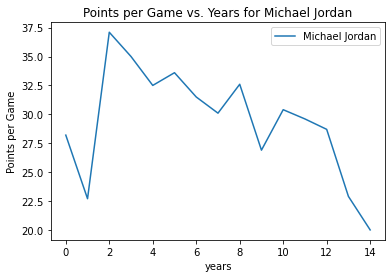

In [20]:
# Display an introductory sentence for the graph.
print("Here is my graph of the stats for Michael Jordan: ")
# Set which column is for the y-axis. The default is for the Years to be the x-axis because this is the way the dataframe is organized.
plt.plot(mjdf[['Points per game']], label = 'Michael Jordan')
# Print a legend for the graph.
plt.legend()
# Print a title for the graph.
plt.title("Points per Game vs. Years for Michael Jordan")
# Set the label for the x-axis.
plt.xlabel('years')
# Set the label for the y-axis.
plt.ylabel('Points per Game')


**Important:** Please note that as Michael Jordan's data has an entry for the '0' year as 28 points per game, it is presumed that the '0' year for Michael Jordan was actually his first year of playing basketball.

Here are some simple observations from the graph above:

**Highest**: The highest scoring season was 37.5 points per game during his third year of playing basketball. 

**Lowest**: The lowest-scoring year was an average of 20 points per game during his last (fifteenth) season. 

**Trend over time**: Michael Jordan's average gradually decreased over time after his third year. 

 

In [21]:
# After checking the Michael Jordan data, store the newly-scraped data into a .csv file:

# Create an object for the string path to the first .csv file.
csv_name = "MJ1.csv"  

# Use the 'to_csv()' method to translate dataframe into a .csv file.
# Since this notebook is in Google Colab, the file will be created within the runtime working directory.
mjdf.to_csv(csv_name)  


# Storing the new data for each of the rest of the players from the assignment:

In [22]:
# Do the same for the data files for each of the other players:
csv1_name = "KB1.csv"
kbdf.to_csv(csv1_name)

In [23]:
csv2_name = "LJ1.csv"
ljdf.to_csv(csv2_name)

In [24]:
csv3_name = "MC1.csv"
mcdf.to_csv(csv3_name)

## Here is a screen shot below illustrating where all four (4) data files were stored using the code shown in this notebook. 

Look on the left: Google Colab stored each of our dataframe `csv` files for us.

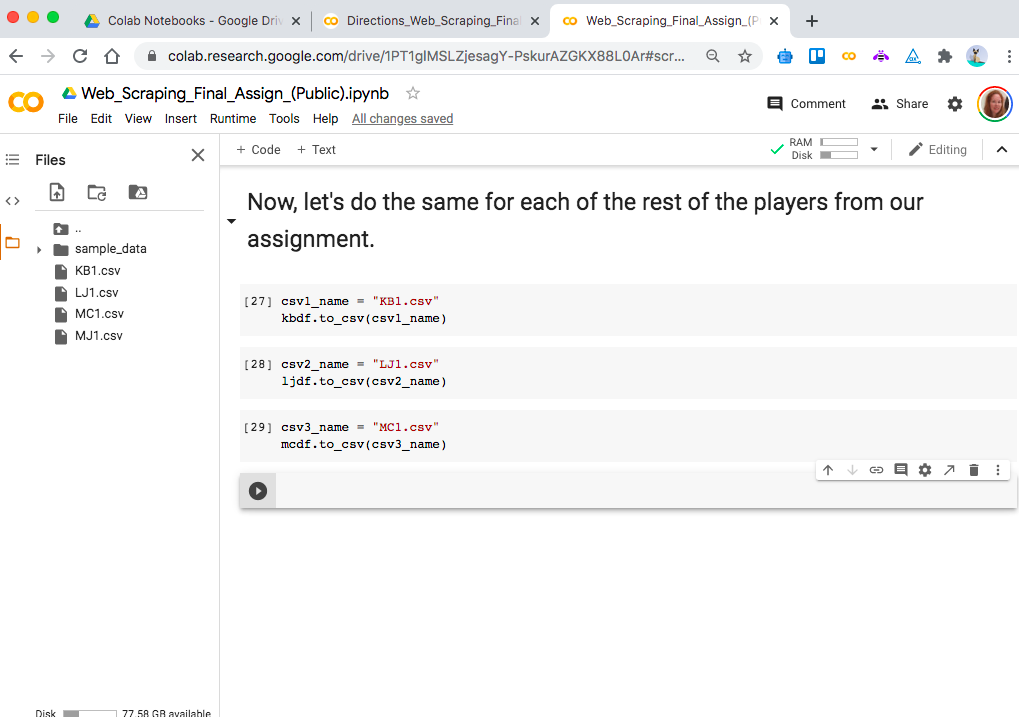



---



---



# Here is the visual representation of the Kobe Bryant data:

Text(0, 0.5, 'Points per Game')

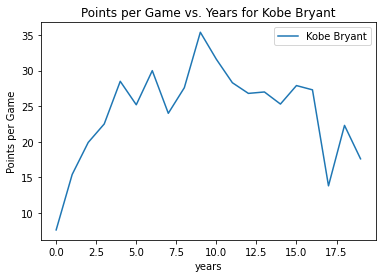

In [ ]:
plt.plot(kbdf[['Points per game']], label = 'Kobe Bryant')
plt.legend()
plt.title("Points per Game vs. Years for Kobe Bryant")
plt.xlabel('years')
plt.ylabel('Points per Game')

**Important:** Please note that as Michael Jordan's data had an entry for the '0' year as 28 points per game, it was presumed that the '0' year for Michael Jordan was actually his first year of playing basketball.

To maintain consistency with the rest of this analysis, it is necessary to continue to assume that the '0' year is the player's first year of playing. Here, it seems that Kobe Bryant did not have an average his first year, or perhaps that there is missing data for the first year. Maybe he was contracted and on the roster, but for whatever reason did not play that year. 


Here are some simple conclusions:

**Highest**: The highest scoring season was 35 points per game during Kobe's ninth year of playing basketball. 

**Lowest**: The equally lowest-scoring years (not counting the first year at 0 points) was an average of 15 points per game during both his first and seventeenth seasons. 

**Trend over time**: Kobe's average has a couple of drastic fluctuations, but excluding these, his average points per game seems to be realtively consistent between 20-30 points per game over the course of his entire career. 

# Here is the visual representation of the LeBron James data:

Text(0, 0.5, 'Points per Game')

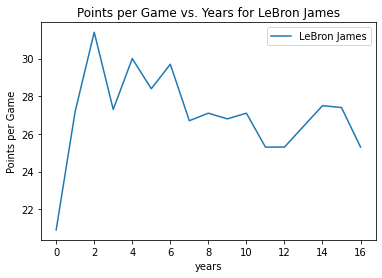

In [25]:
plt.plot(ljdf[['Points per game']], label = 'LeBron James')
plt.legend()
plt.title("Points per Game vs. Years for LeBron James")
plt.xlabel('years')
plt.ylabel('Points per Game')

Here are a few simple conclusions:

Highest-scoring year: 3rd year at roughly 31 points per game

Lowest-scoring year: 25 points per game during 3 years of playing during his 12th, 13th, and 17th years (again counting the '0' year as the first, and excluding it as the lowest because this data point needs more information)

Trend over time: Compared to the other players, LeBron James seems to have been more consistent of a player over the entire course of his basketball career in that:

1) There aren't any drastic increases or decreases (except for at the very beginning of his career), and;

2) The range within most of the activity of the line graph is roughly between 26 and 30, which is higher than where Kobe had the most consistent activity in the graph of his data. 

# Here is the visual representation of the Michael Curry data:

Text(0, 0.5, 'Points per Game')

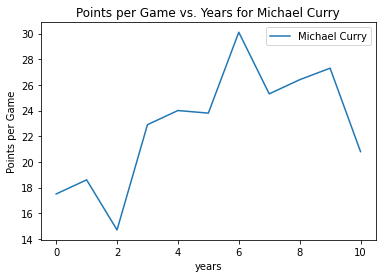

In [ ]:
plt.plot(mcdf[['Points per game']], label = 'Michael Curry')
plt.legend()
plt.title("Points per Game vs. Years for Michael Curry")
plt.xlabel('years')
plt.ylabel('Points per Game')

Here are a few simple observations:

Highest-scoring year: 7th year at roughly 30 points per game

Lowest-scoring year: 3rd year at roughly 14 points per game

Trend over time: Michael Curry has an overall increase over time, but just by looking at the graph, it would seem that he was a bit more inconsistent with some large highs and lows. However, one cannot conclude this because the number of years he played is less, and hence the data comparison may not be entirely comparable. 